In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("car_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df["Vehicle_Age"] = 2021-df.Year

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [7]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [8]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [9]:
df=pd.get_dummies(df, drop_first=True)

In [10]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [11]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True).fit(X_train, y_train)

In [15]:
model.coef_

array([ 4.45257970e-01, -1.87067298e-05, -8.13577578e-01, -3.19047765e-01,
        2.61924627e+00,  6.06486867e-01, -1.22016745e+00, -1.00868282e+00])

In [16]:
print("Model intercept  : ", model.intercept_, "\n")
for i in range(len(X.columns)):
    print(X.columns[i], ": ", model.coef_[i])

Model intercept  :  4.604429051577005 

Present_Price :  0.4452579698976288
Kms_Driven :  -1.870672975702183e-05
Owner :  -0.8135775776586671
Vehicle_Age :  -0.31904776455888734
Fuel_Type_Diesel :  2.6192462729450905
Fuel_Type_Petrol :  0.6064868667913275
Seller_Type_Individual :  -1.220167446042971
Transmission_Manual :  -1.0086828216162687


In [17]:
coeff_df=pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
Present_Price,0.445258
Kms_Driven,-0.000019
Owner,-0.813578
Vehicle_Age,-0.319048
Fuel_Type_Diesel,2.619246
Fuel_Type_Petrol,0.606487
Seller_Type_Individual,-1.220167
Transmission_Manual,-1.008683


In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [19]:
y_pred=model.predict(X_test)
y_pred

array([10.70729552, 10.87520713,  4.43096899,  5.91337788,  2.54941855,
        9.03674575,  7.2737809 ,  1.49360032, 16.02286635,  4.74188631,
        6.7140433 ,  6.40320371,  3.4644454 ,  3.4148824 , -0.60954639,
        4.17855023,  9.09429896, -0.30209302,  9.1878139 ,  1.18733586,
        7.5000935 , 18.19046601, 19.54269265,  0.21434982,  2.15321632,
        4.76671337,  4.95716413,  6.82822836,  5.23694236,  5.48340774,
        4.36427226,  7.93602233,  5.74539229, -0.54343788,  0.66628503,
        7.00623246,  7.3790224 ,  5.4235689 ,  1.17465734,  1.16263268,
        2.06339611,  5.1531104 , 14.03667284, -9.2787032 ,  1.39494051,
        3.97812269, -0.91681301,  8.44163201,  4.34565296,  4.84278586,
        5.18366168, 16.39104119,  0.85271469,  1.65187499,  1.6335204 ,
       -1.42292807,  2.85945813,  0.66521417, -1.75047375,  1.6120861 ,
        0.6862596 ])

In [20]:
rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
mae=mean_absolute_error(y_test,y_pred)
R2_score=r2_score(y_test,y_pred)

In [22]:
print("Model testing performance:")
print("--------------------------")
print('RMSE is {:29}'.format(rmse))
print("MAE is {:30}".format(mae))
print('R2 score is {:25}'.format(R2_score))

Model testing performance:
--------------------------
RMSE is            1.9460540138874833
MAE is             1.1811769157076817
R2 score is        0.8589039971923134


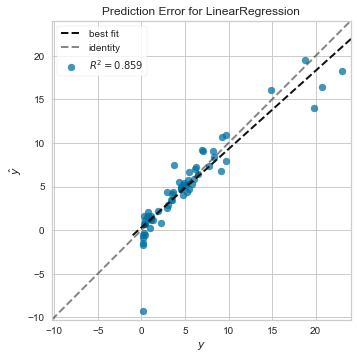

In [24]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
lm= LinearRegression(normalize=True)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [25]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result_sample = results.head(25)
result_sample

,Actual,Predicted
67,9.25,10.707296
99,9.65,10.875207
266,3.65,4.430969
222,6.00,5.913378
24,2.90,2.549419
282,8.25,9.036746
279,6.25,7.273781
138,0.60,1.493600
50,14.90,16.022866
234,5.50,4.741886


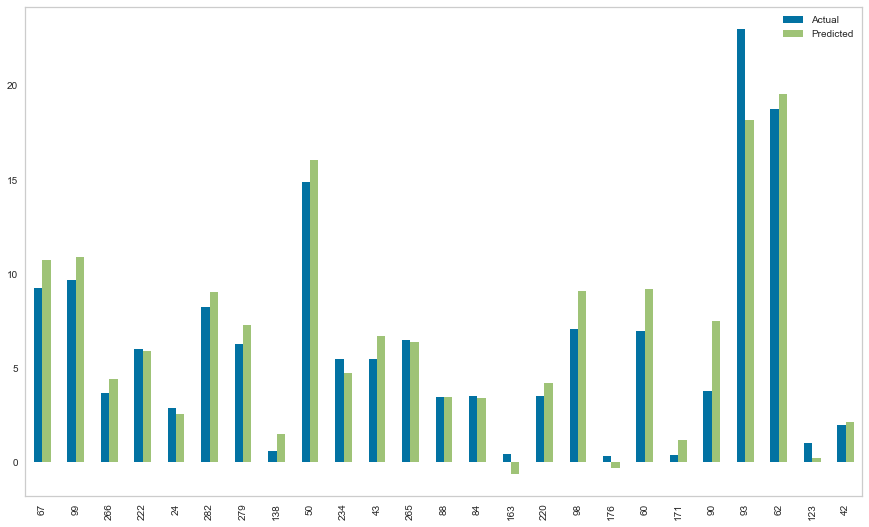

In [26]:
result_sample.plot(kind='bar',figsize=(15,9))
plt.grid(linestyle=':', linewidth='0.5', color='green')
plt.show()

In [34]:
def show_metrics(y_test, y_pred):
    rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
    mae=mean_absolute_error(y_test,y_pred)
    R2_score=r2_score(y_test,y_pred)
    print("Model testing performance:")
    print("--------------------------")
    print('RMSE is {:29}'.format(rmse))
    print("MAE is {:30}".format(mae))
    print('R2 score is {:25}'.format(R2_score))

In [30]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [32]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [35]:
show_metrics(y_test, y_pred)

Model testing performance:
--------------------------
RMSE is            1.9026594573849422
MAE is             1.1854250171898177
R2 score is        0.8651263662232391


In [36]:
alpha_space = np.linspace(0.1, 20, 100)
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [37]:
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [38]:
ridgecv.alpha_

0.1

In [39]:
alpha_space = np.linspace(0.01, 20, 100)
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 2.11919192e-01, 4.13838384e-01, 6.15757576e-01,
       8.17676768e-01, 1.01959596e+00, 1.22151515e+00, 1.42343434e+00,
       1.62535354e+00, 1.82727273e+00, 2.02919192e+00, 2.23111111e+00,
       2.43303030e+00, 2.63494949e+00, 2.83686869e+00, 3.03878788e+00,
       3.24070707e+00, 3.44262626e+00, 3.64454545e+00, 3.84646465e+00,
       4.04838384e+00, 4.25030303e+0...
       1.53558586e+01, 1.55577778e+01, 1.57596970e+01, 1.59616162e+01,
       1.61635354e+01, 1.63654545e+01, 1.65673737e+01, 1.67692929e+01,
       1.69712121e+01, 1.71731313e+01, 1.73750505e+01, 1.75769697e+01,
       1.77788889e+01, 1.79808081e+01, 1.81827273e+01, 1.83846465e+01,
       1.85865657e+01, 1.87884848e+01, 1.89904040e+01, 1.91923232e+01,
       1.93942424e+01, 1.95961616e+01, 1.97980808e+01, 2.00000000e+01]),
        cv=10)

In [40]:
ridgecv.alpha_

0.21191919191919192

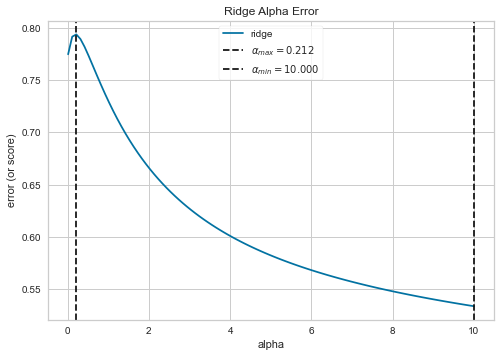

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [41]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.01, 10, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [42]:
y_pred=ridgecv.predict(X_test)
show_metrics(y_test, y_pred)

Model testing performance:
--------------------------
RMSE is            1.8181007089470476
MAE is             1.1382482865552852
R2 score is        0.8768481890690062


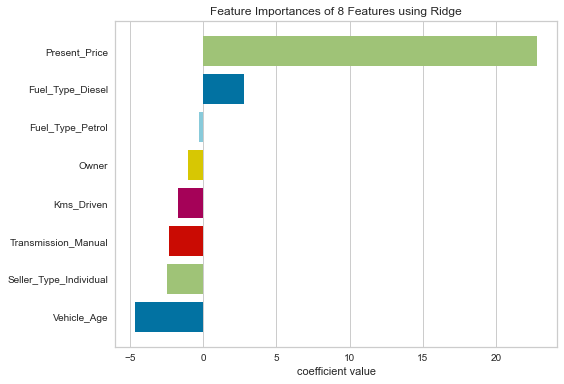

<AxesSubplot:title={'center':'Feature Importances of 8 Features using Ridge'}, xlabel='coefficient value'>

In [43]:
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [44]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [45]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
show_metrics(y_test,y_pred)

Model testing performance:
--------------------------
RMSE is             4.844430603529284
MAE is             3.1983166124538154
R2 score is       0.12563974476813822


In [46]:
alpha_space = np.linspace(0.001, 10, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10).fit(X_train, y_train)

In [47]:
y_pred=lasso_cv_model.predict(X_test)
show_metrics(y_test,y_pred)

Model testing performance:
--------------------------
RMSE is            1.9323214066935661
MAE is             1.1726681712627112
R2 score is        0.8608882992084925


In [48]:
lasso_cv_model.alpha_

0.001